In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The Titanic dataset contains information on the passengers who were aboard the Titanic. The goal of this analysis is to explore the data and uncover insights related to the survival of passengers.

In [26]:
# Load the Titanic dataset
titanic_df = pd.read_csv("Titanic_Dataset.csv")

# Display the first few rows of the dataset
titanic_df.head()

,Unnamed: 0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


<h2>Data Cleaning

- Load dataset
- Handle missing values
- Correct data types
- Remove duplicates

In [28]:
# Check for missing values
titanic_df.isnull().sum()

Unnamed: 0       0
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [29]:
# Handle missing values (example: fill missing Age with median age)
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

In [30]:
# Drop rows where 'Embarked' is missing
titanic_df.dropna(subset=['Embarked'], inplace=True)

In [31]:
titanic_df.dropna(subset=['Unnamed: 0'], inplace=True)

In [32]:
# Fill missing 'Cabin' values with 'Unknown'
titanic_df['Cabin'].fillna('Unknown', inplace=True)

In [33]:
# Convert data types if necessary
titanic_df['Survived'] = titanic_df['Survived'].astype('int')

In [34]:
# Check for duplicates
titanic_df.duplicated().sum()

0

In [35]:
# Remove duplicates
titanic_df.drop_duplicates(inplace=True)

In [36]:
titanic_df.head()

,Unnamed: 0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Unknown,Q,0
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Unknown,S,1
2,2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Unknown,Q,0
3,3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Unknown,S,0
4,4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Unknown,S,1


In [37]:
titanic_df.drop(titanic_df.columns[0], axis=1, inplace=True)

In [38]:
titanic_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Unknown,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Unknown,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Unknown,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Unknown,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Unknown,S,1


<h2> Exploratory Data Analysis (EDA)

<h3>Descriptive Statistics

- Summary statistics of numerical features
- Count of categorical features

In [40]:
# Summary statistics of numerical features
titanic_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,29.599282,0.447368,0.392344,35.627188,0.363636
std,120.810458,0.841838,12.703770,0.896760,0.981429,55.907576,0.481622
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [41]:
# Count of categorical features
titanic_df['Sex'].value_counts()
titanic_df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

<h3>Data Visualization

- Histograms, bar plots, box plots, etc.
- Survival rate by different features (age, sex, class)

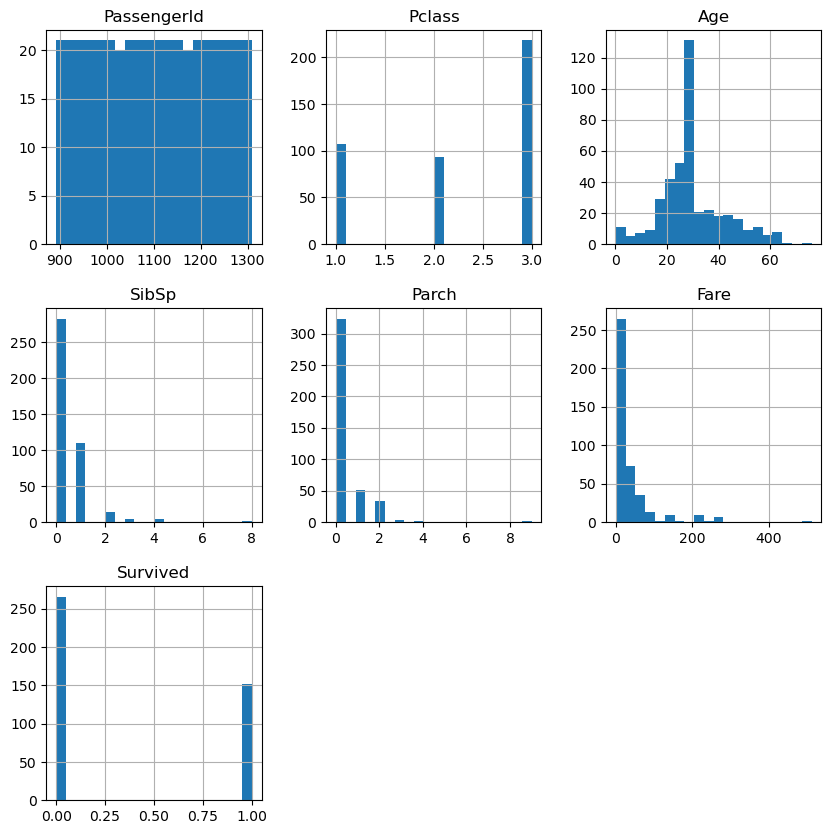

In [44]:
# Histograms for numerical features
titanic_df.hist(bins=20, figsize=(10,10))
plt.show()

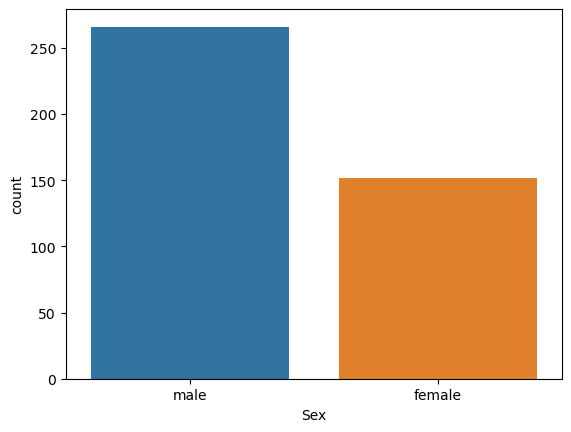

In [45]:
# Bar plot for categorical features
sns.countplot(x='Sex', data=titanic_df)
plt.show()

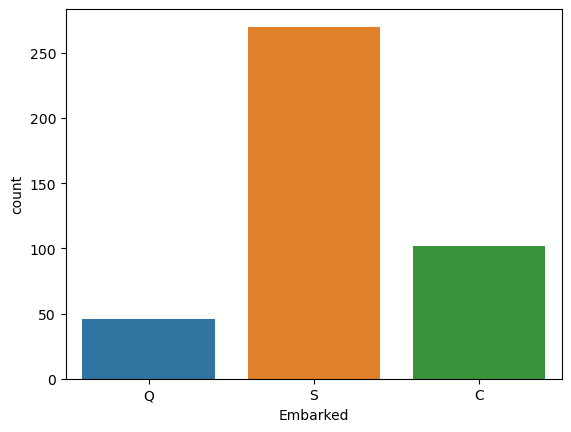

In [46]:
sns.countplot(x='Embarked', data=titanic_df)
plt.show()

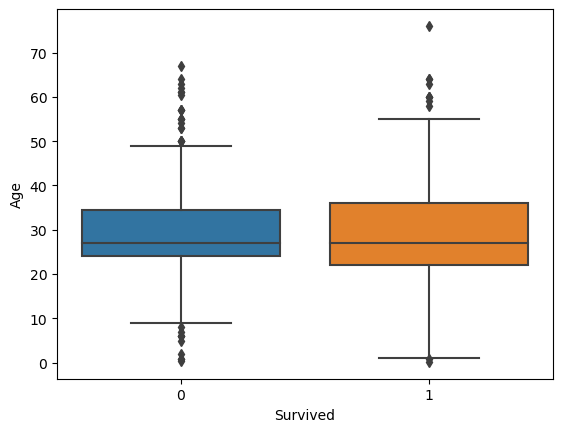

In [47]:
# Box plot for Age distribution by Survival
sns.boxplot(x='Survived', y='Age', data=titanic_df)
plt.show()

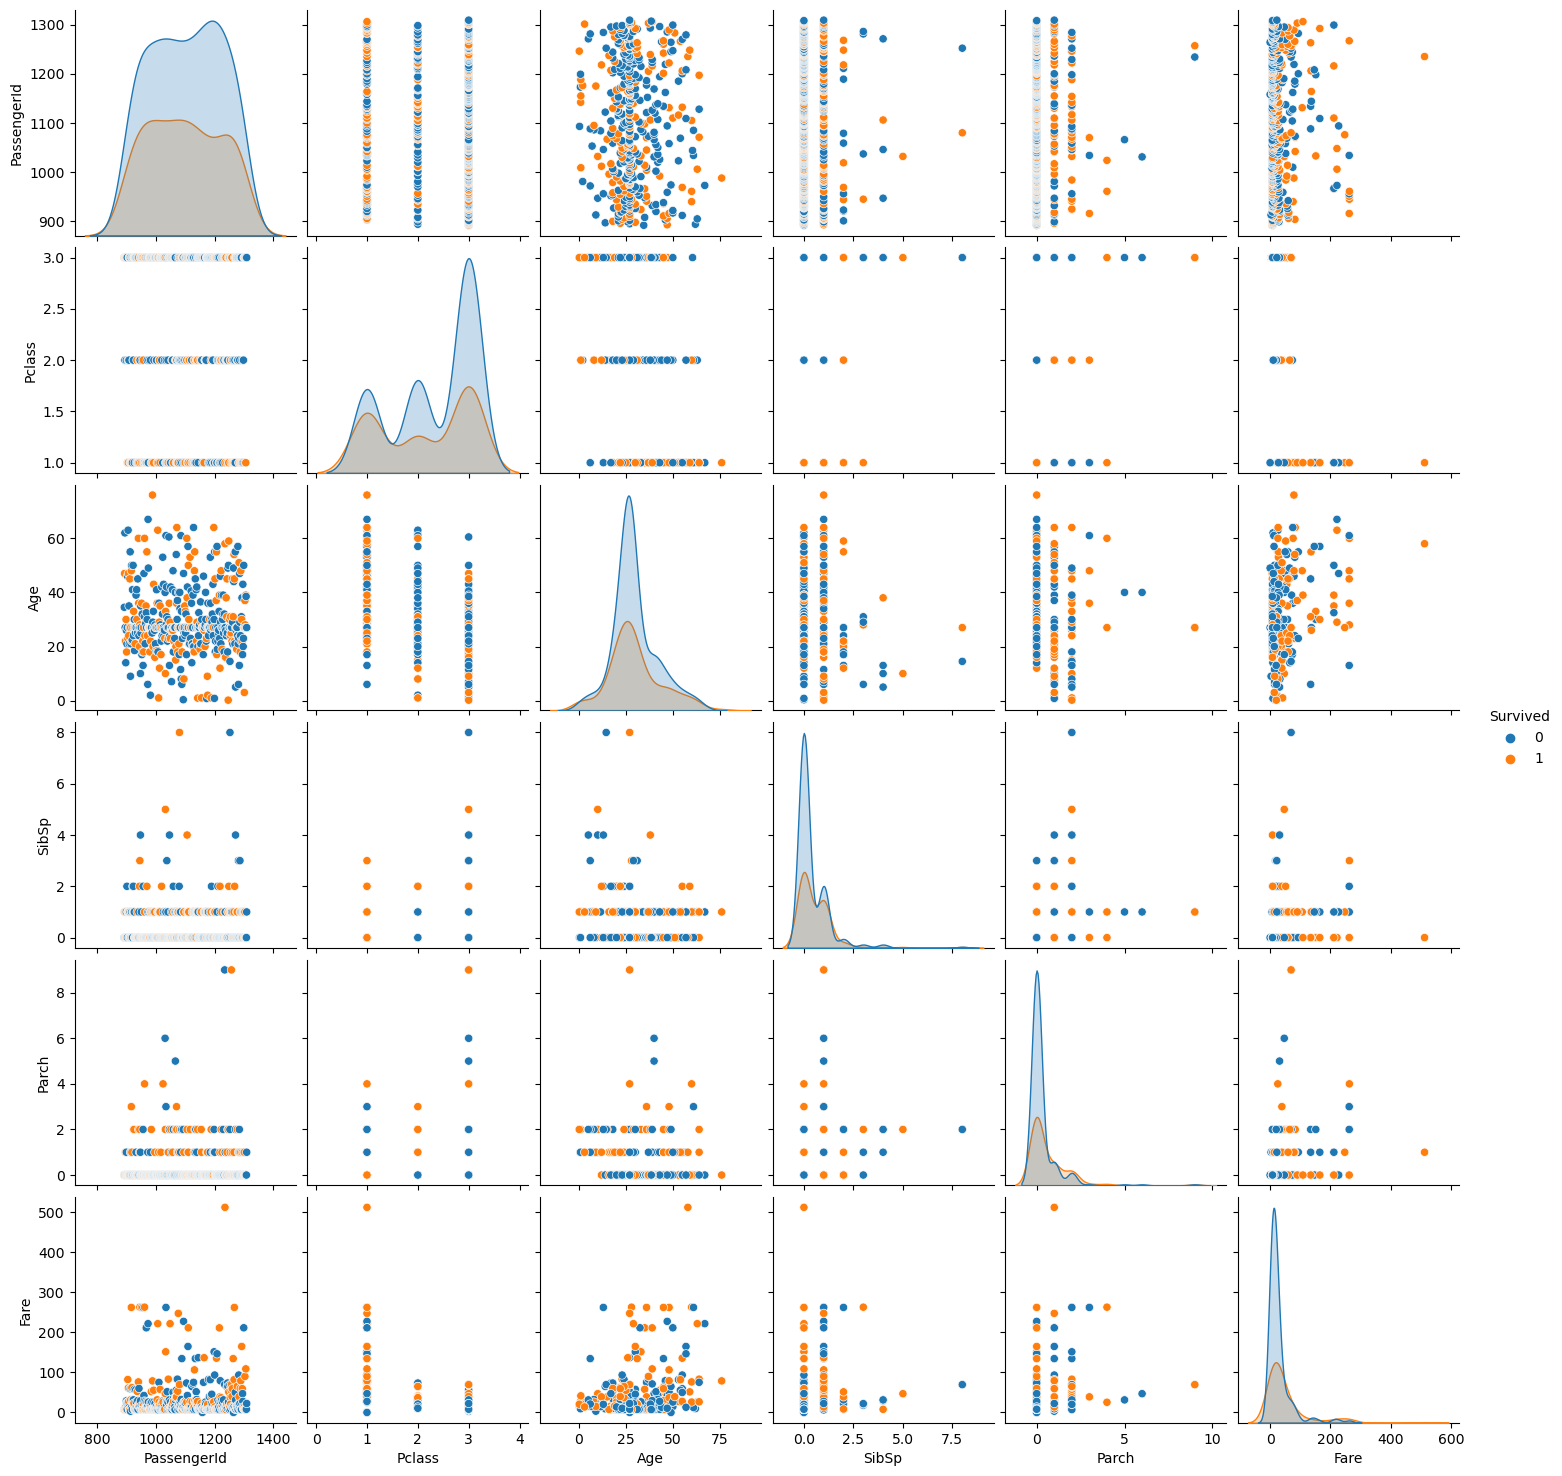

In [48]:
# Pair plot to explore relationships
sns.pairplot(titanic_df, hue='Survived')
plt.show()

<h3>Relationship Analysis

- Correlation matrix
- Pair plots

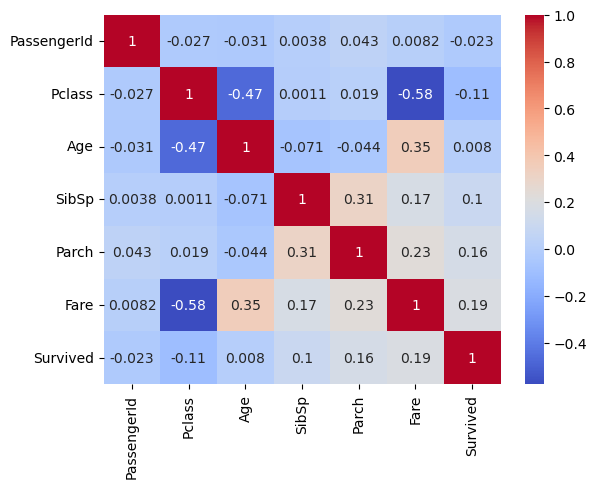

In [49]:
# Correlation matrix
correlation_matrix = titanic_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

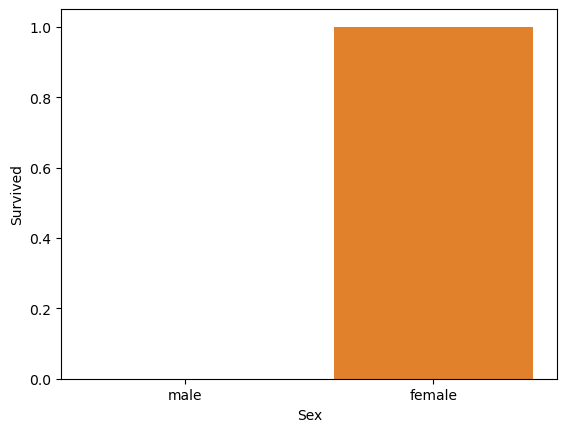

In [50]:
# Survival rate by different features
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.show()

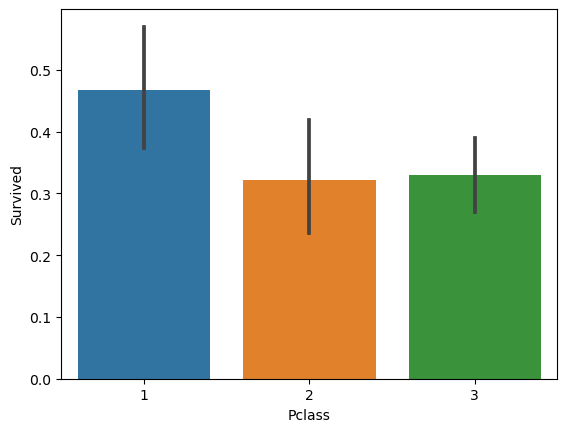

In [51]:
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.show()

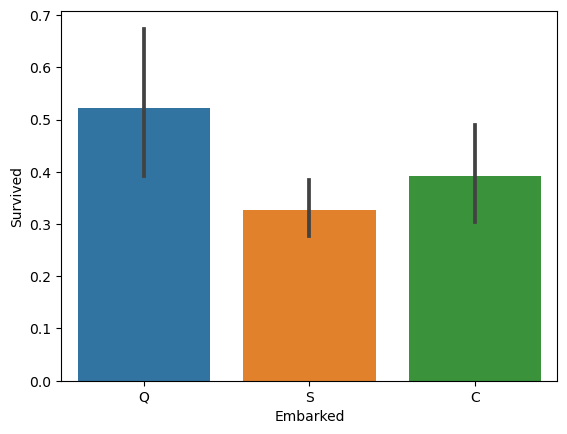

In [52]:
sns.barplot(x='Embarked', y='Survived', data=titanic_df)
plt.show()

<h2>Conclusion


- Survival Rates by Gender:

Females had a significantly higher survival rate compared to males. This indicates that gender played a crucial role in determining the likelihood of survival.

- Survival Rates by Passenger Class:

Passengers in the first class had the highest survival rate, followed by those in the second class, with the third class having the lowest survival rate. This suggests that socioeconomic status was an important factor in survival chances.

- Age Distribution:

The age distribution of passengers showed that children had a relatively higher survival rate compared to adults. This could be due to the "women and children first" policy during the evacuation.

- Embarkation Port:

Passengers who embarked at Cherbourg (C) had a higher survival rate compared to those who embarked at Southampton (S) and Queenstown (Q). This might be related to the distribution of passenger classes and other socioeconomic factors.

- Fare and Survival:

There was a positive correlation between fare and survival rate, indicating that passengers who paid higher fares (likely those in higher classes) had better chances of survival.

- Cabin Information:

While many cabin entries were missing, passengers with recorded cabin numbers tended to have higher survival rates, suggesting that cabin location could be an important factor.

- Correlation Matrix:

The correlation matrix highlighted the relationships between various numerical features. Notably, there was a strong positive correlation between fare and class, and a negative correlation between class and survival.
These insights provide a comprehensive understanding of the factors that influenced pass